 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull

<bound method DataFrame.isnull of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN 

In [4]:
# Drop nulls
whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [18]:
# Drop nulls
algo_df.dropna(inplace = True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('sp500_history.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [20]:
# Check Data Types
sp500_df.dtypes

sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [21]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\aaron.bunting\AppData\Local\Temp\ipykernel_25048\2039212170.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)


In [22]:
sp500_df.dtypes

Close    float64
dtype: object

In [23]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()

sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [24]:
# Drop nulls
sp500_df.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Close': 'SP_500_Returns'}, inplace=True)

sp500_df.head()

,SP_500_Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df,sp500_df],axis=1)

combined_df.dropna(inplace=True)

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

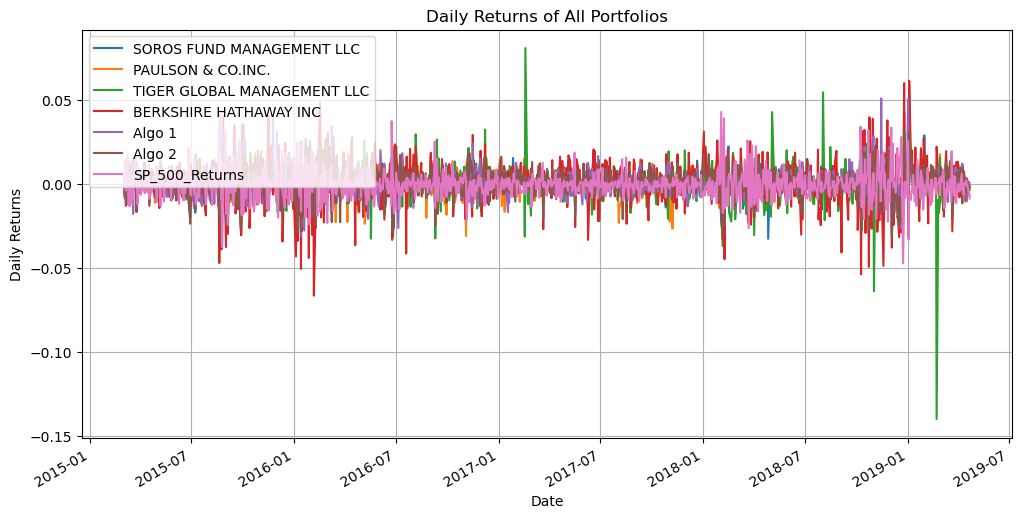

In [29]:
# Plot daily returns of all portfolios
import matplotlib.pyplot as plt
combined_df.plot(kind='line', figsize=(12, 6), title='Daily Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

#### Calculate and Plot cumulative returns.

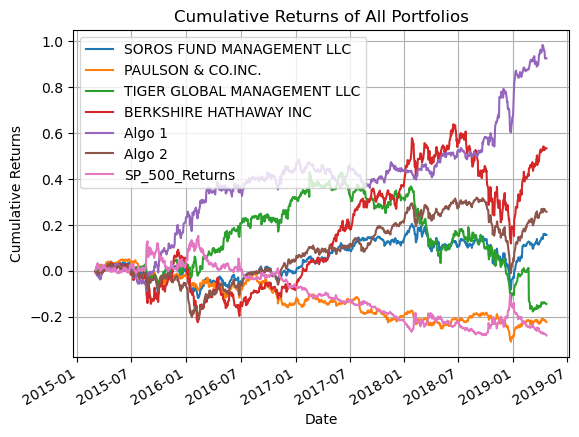

In [30]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(kind='line', title='Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


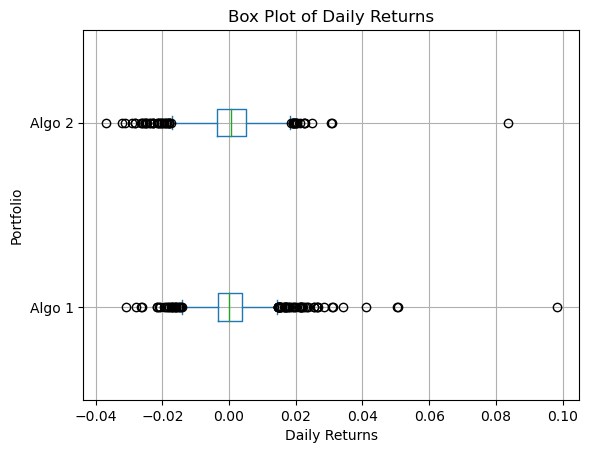

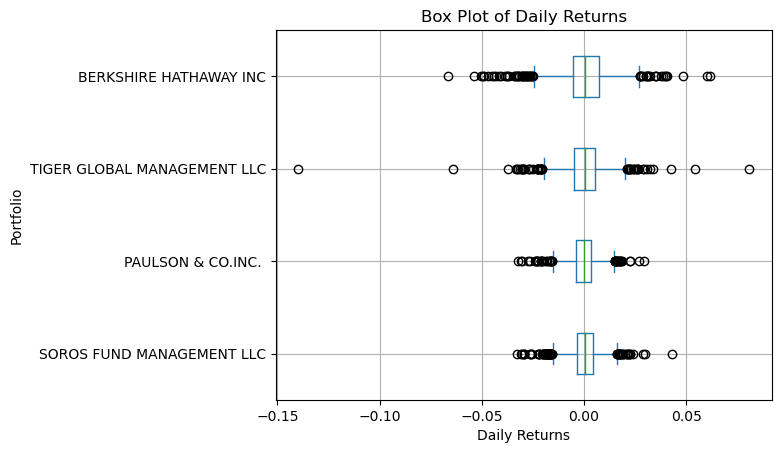

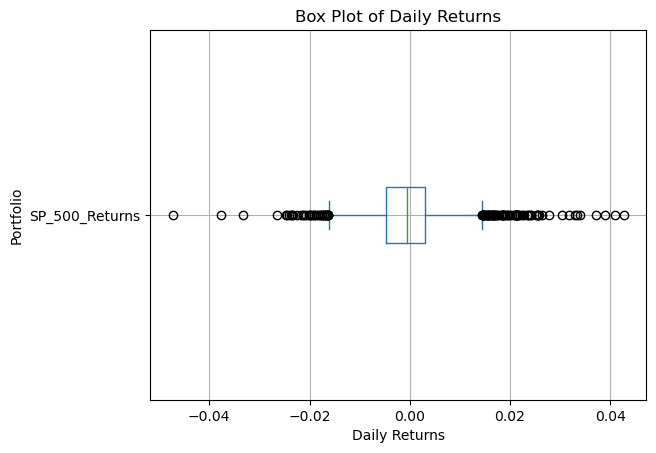

In [31]:
# Box plot to visually show risk
algo_df.plot(kind='box', vert=False, title='Box Plot of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Portfolio')
plt.grid(True)
plt.show()

whale_df.plot(kind='box', vert=False, title='Box Plot of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Portfolio')
plt.grid(True)
plt.show()


sp500_df.plot(kind='box', vert=False, title='Box Plot of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Portfolio')
plt.grid(True)
plt.show()

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()

combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP_500_Returns                 0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_df['SP_500_Returns'].std()

# Determine which portfolios are riskier than the S&P 500
risk_portfolio = combined_std[combined_std > sp500_std]

print("Portfolios Riskier than S&P 500:")
print(risk_portfolio)

Portfolios Riskier than S&P 500:
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 2                         0.008341
SP_500_Returns                 0.008587
dtype: float64


### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)

print("Annualized Standard Deviations (252 trading days):")
print(annualized_std)

Annualized Standard Deviations (252 trading days):
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP_500_Returns                 0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

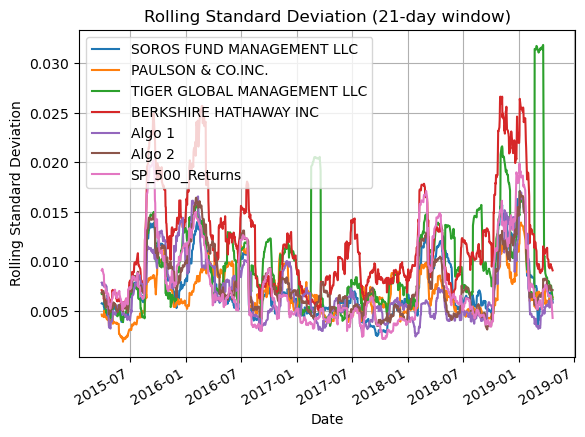

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(kind='line', title='Rolling Standard Deviation (21-day window)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Calculate and plot the correlation

<Axes: >

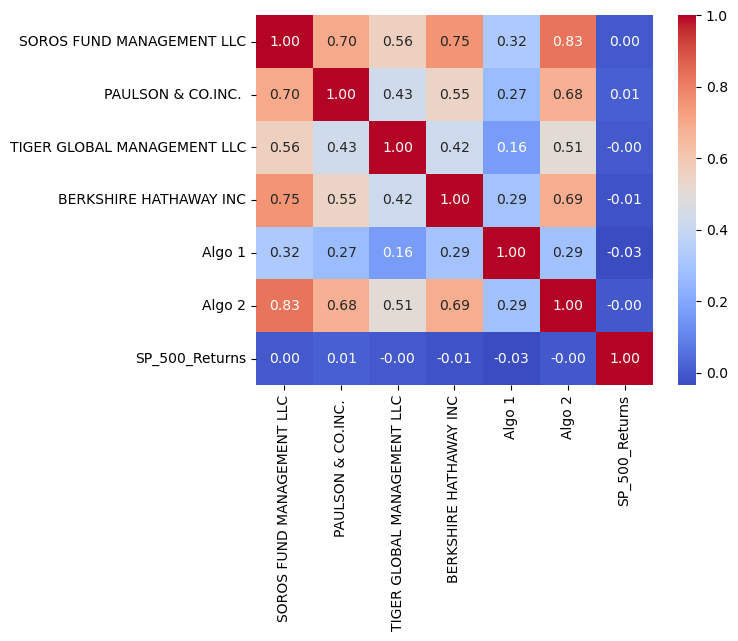

In [36]:
# Calculate the correlation
import seaborn as sns

combined_corr = combined_df.corr()
# Display de correlation matrix
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt='.2f')


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

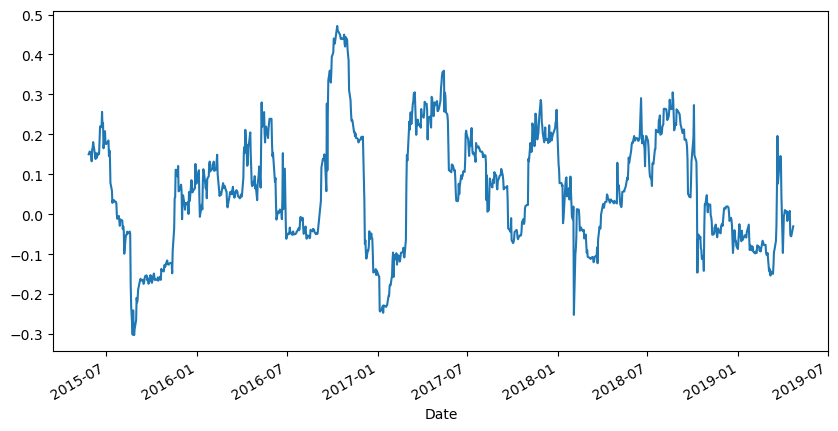

In [37]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['SP_500_Returns'])
# Calculate variance of S&P 500
variance = combined_df['SP_500_Returns'].rolling(window=60).var()

# Computing beta'
beta = covariance / variance

# Plot beta trend

beta.plot(figsize = (10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [38]:
# Use `ewm` to calculate the rolling window

ewm_rolling = combined_df.ewm(span=21).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratio '}>

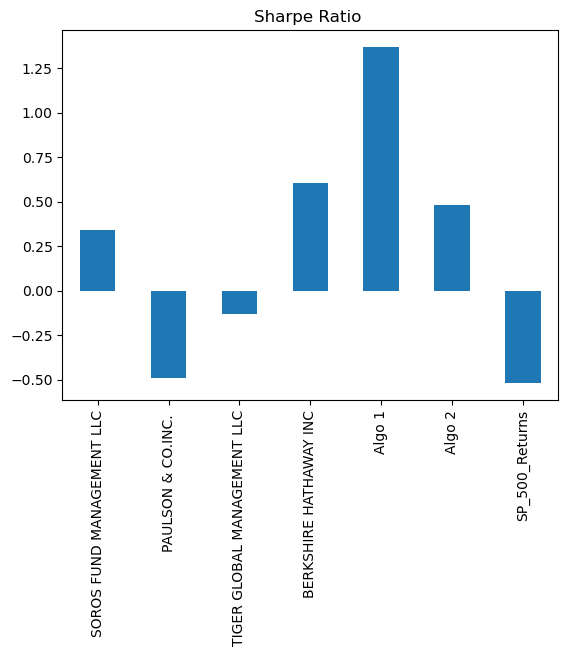

In [40]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind = 'bar', title = 'Sharpe Ratio ')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algorithmic methods excelled in risk and management over the S&P 500 and the Whale Portfolios. Algorithm 1 topped in overall performance, while Algo 2 matches the most but trailed behind Berkshire Hathaway, the second best performer. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Reading data from 1st stock
aapl_historical = pd.read_csv('aapl_historical.csv',index_col= 'Trade DATE', infer_datetime_format= True, parse_dates = True)

In [42]:
# Reading data from 2nd stock
cost_historical = pd.read_csv('cost_historical.csv',index_col= 'Trade DATE', infer_datetime_format= True, parse_dates = True)

In [43]:
# Reading data from 3rd stock
goog_historical = pd.read_csv('goog_historical.csv',index_col= 'Trade DATE', infer_datetime_format= True, parse_dates = True)

In [44]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([aapl_historical, cost_historical, goog_historical], axis = 1)

In [45]:
# Reset Date index
combined_stocks.reset_index(inplace = True)

In [46]:
# Reorganize portfolio data by having a column per symbol

combined_stocks.columns = ['Trade DATE','AAPL Symbol', 'AAPL NOCP', 'COST Symbol', 'COST NOCP', 'GOOG Symbol', 'GOOG NOCP' ]

combined_stocks = combined_stocks[['Trade DATE', 'AAPL NOCP', 'COST NOCP', 'GOOG NOCP']]
combined_stocks = combined_stocks.set_index("Trade DATE")

combined_stocks.columns = ['AAPL', 'COST', 'GOOG']


In [47]:
# Calculate daily returns

combined_daily_returns = combined_stocks.pct_change()

# Drop NAs

combined_daily_returns.dropna(inplace=True)

# Display sample data

combined_daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

port_return = combined_daily_returns.dot(weights)


# Display sample data

port_return.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [49]:
# Join your returns DataFrame to the original returns DataFrame

combined_df['Custom'] = port_return

In [50]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized `std`

personalized_annualized_std = combined_df['Custom'].std() * np.sqrt(252)

personalized_annualized_std

0.21313726813169026

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

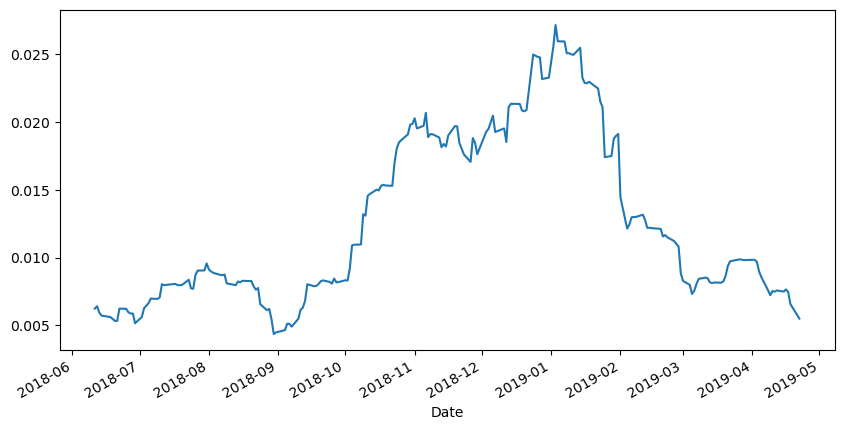

In [52]:
# Calculate rolling standard deviation

personalized_rolling_std = combined_df['Custom'].rolling(window=21).std()


# Plot rolling standard deviation
personalized_rolling_std.plot(figsize = (10,5))

### Calculate and plot the correlation

In [54]:
# Calculate and plot the correlation

personalized_corr = combined_df.corr()

personalized_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500_Returns,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.061503
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.025680
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.036047
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.006755
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.073296
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.039910
SP_500_Returns,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.869976
Custom,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,0.869976,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

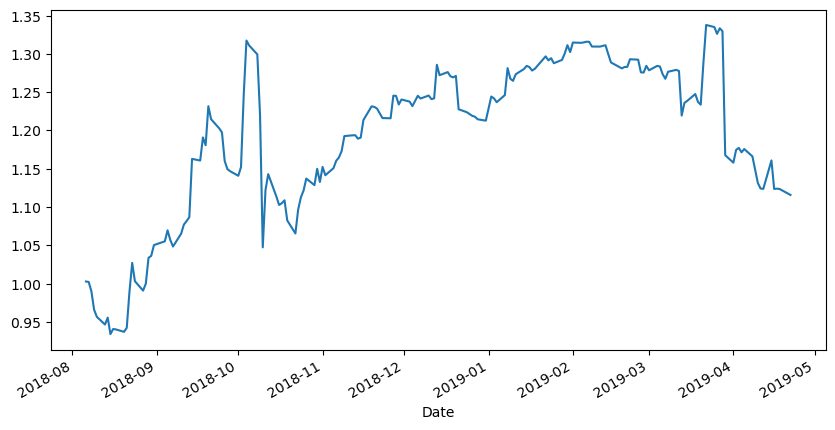

In [59]:
# Calculate and plot Beta

personalized_covar = combined_df['Custom'].rolling(window=60).cov(combined_df['SP_500_Returns'])

personalized_beta = personalized_covar / variance

personalized_beta.plot(figsize=(10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios_custom = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios with Personalized Portfolio'}>

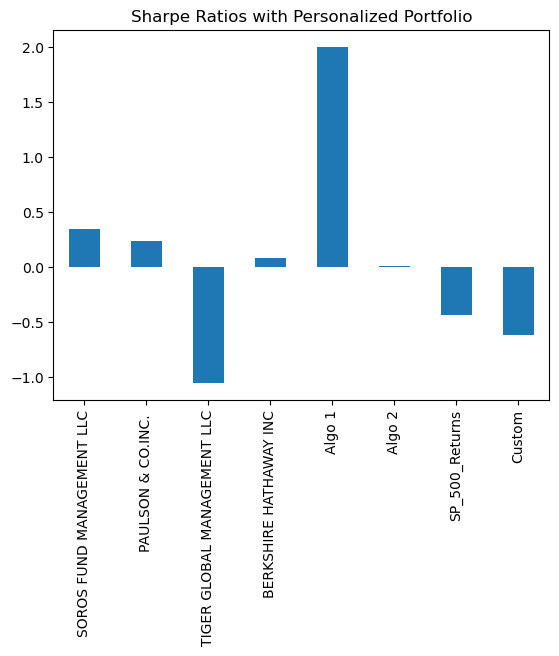

In [62]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

sharpe_ratios_custom.plot(kind="bar", title="Sharpe Ratios with Personalized Portfolio")

### How does your portfolio do?

Write your answer here!

In [ ]:
The new portfolio underperforms the orginal data. In comparison to the S&P 500 and the other portfolios we are the second worst peforming in risk managmenet and return. 